# Project Overview

This project explores both supervised and unsupervised machine learning techniques to analyze and group vehicles based on a set of numerical features. The dataset consists of various vehicle types with characteristics that help distinguish between categories buses, vans, and cars.

A chain of car repair shops called`Prospect Auto` asked for a model that would differentiate all 3 vehicles based on the silhouette.

**Supervised Learning:**

 * Models: LogisticRegression, DecisionTree, RandomForest, SVM, XGBoost
 * Model evaluation: using accuracy, confusion matrix, and classification report

**Unsupervised Learning:**

 * PCA for dimensionality reduction
 * K-Means Clustering with Elbow Method and Silhouette Score
 * DBSCAN for density-based clustering


> **This notebook focuses on performing exploratory data analysis (EDA) to understand feature distributions and class balance.**






# Key Takeaways

The target variable was the **vehicle class** (bus, car, or van), and the dataset included several numerical features describing geometric properties extracted from vehicle silhouettes.

*   The class distribution shows some imbalance, with cars being the most common class. However, all classes are represented, allowing for fair training and evaluation of the classification models.


*   EDA showed that there is some separation between the classes, and many features have a significant overlap. This indicates that machine learning models are needed to capture hidden patterns and accurate classification.

# Import Liabraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vehicles = pd.read_csv('/content/drive/MyDrive/Data_Projects/Vehicle_Project_Classification/Vehicle_Machine_Learning_Classification/Data/vehicle.csv')

# About the Data

The dataset includes multiple numerical features that describe physical or operational characteristics of vehicles, such as:

* Compactness
*	Circularity
*	Distance circularity
*	Radius ratio
*	Aspect ratio
*	Elongatedness
*	Major and minor axis length

Each sample is labeled with a vehicle class, making it suitable for supervised learning.

In [ ]:
vehicles.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [ ]:
print('Rows and Columns:', vehicles.shape)

Rows and Columns: (846, 19)


In [ ]:
vehicles.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
vehicles.duplicated().sum()

np.int64(0)

In [ ]:
vehicles.isnull().sum()

,0
compactness,0
circularity,5
distance_circularity,4
radius_ratio,6
pr.axis_aspect_ratio,2
max.length_aspect_ratio,0
scatter_ratio,1
elongatedness,1
pr.axis_rectangularity,3
max.length_rectangularity,0


# Univariate Analysis

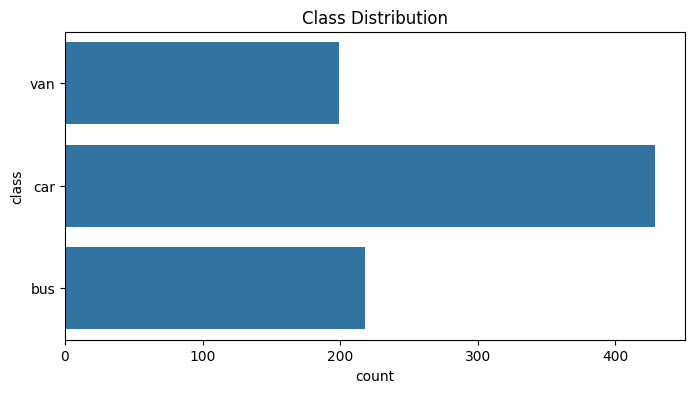

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(vehicles['class'])
plt.title('Class Distribution')
plt.show()

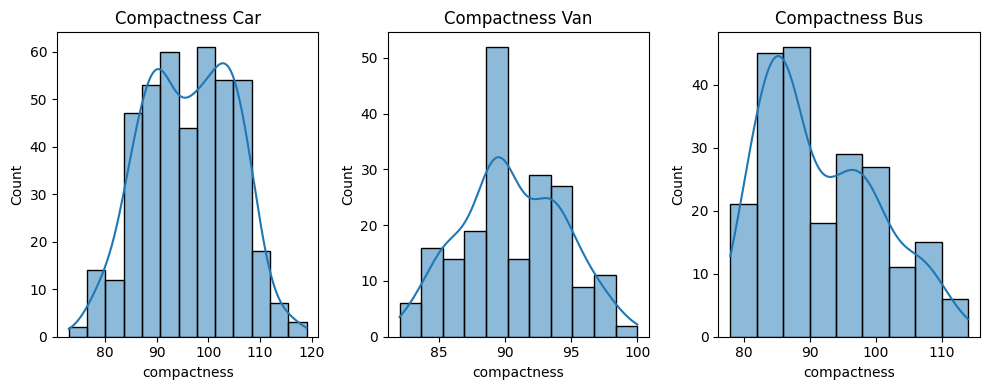

In [ ]:
# Filter for each class
vehicles_car = vehicles[vehicles['class']=='car']
vehicles_van = vehicles[vehicles['class']=='van']
vehicles_bus = vehicles[vehicles['class']=='bus']

# Visualize compactness
plt.figure(figsize=(10 ,4))
plt.subplot(1, 3, 1)
sns.histplot(vehicles_car['compactness'], kde=True)
plt.title('Compactness Car')

plt.subplot(1, 3, 2)
sns.histplot(vehicles_van['compactness'], kde=True)
plt.title('Compactness Van')

plt.subplot(1, 3, 3)
sns.histplot(vehicles_bus['compactness'], kde=True)
plt.title('Compactness Bus')

plt.tight_layout()
plt.show()

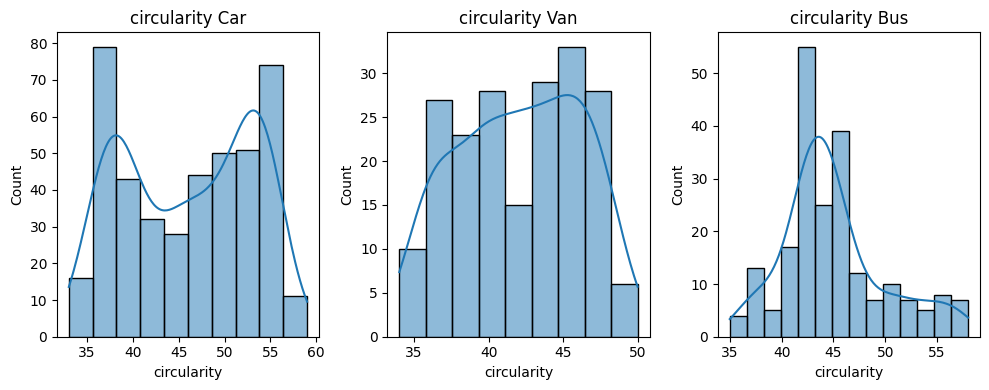

In [ ]:
# Filter for each class
vehicles_car = vehicles[vehicles['class']=='car']
vehicles_van = vehicles[vehicles['class']=='van']
vehicles_bus = vehicles[vehicles['class']=='bus']

# Visualize circularity
plt.figure(figsize=(10 ,4))
plt.subplot(1, 3, 1)
sns.histplot(vehicles_car['circularity'], kde=True)
plt.title('circularity Car')

plt.subplot(1, 3, 2)
sns.histplot(vehicles_van['circularity'], kde=True)
plt.title('circularity Van')

plt.subplot(1, 3, 3)
sns.histplot(vehicles_bus['circularity'], kde=True)
plt.title('circularity Bus')

plt.tight_layout()
plt.show()

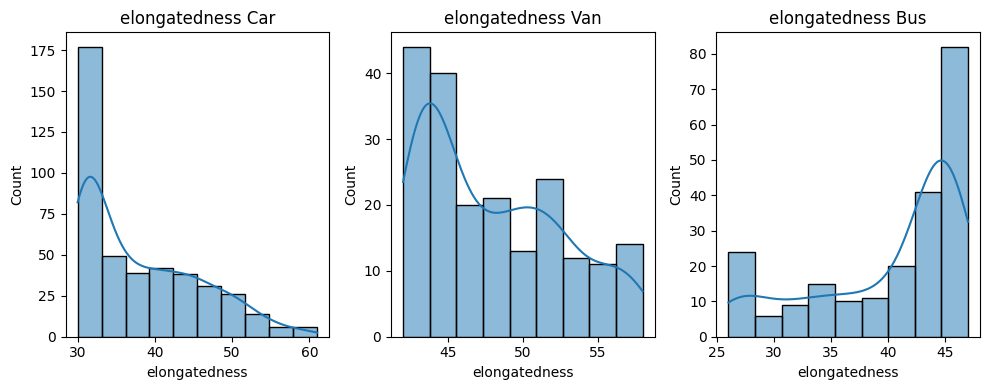

In [ ]:
# Filter for each class
vehicles_car = vehicles[vehicles['class']=='car']
vehicles_van = vehicles[vehicles['class']=='van']
vehicles_bus = vehicles[vehicles['class']=='bus']

# Visualize elongatedness
plt.figure(figsize=(10 ,4))
plt.subplot(1, 3, 1)
sns.histplot(vehicles_car['elongatedness'], kde=True)
plt.title('elongatedness Car')

plt.subplot(1, 3, 2)
sns.histplot(vehicles_van['elongatedness'], kde=True)
plt.title('elongatedness Van')

plt.subplot(1, 3, 3)
sns.histplot(vehicles_bus['elongatedness'], kde=True)
plt.title('elongatedness Bus')

plt.tight_layout()
plt.show()

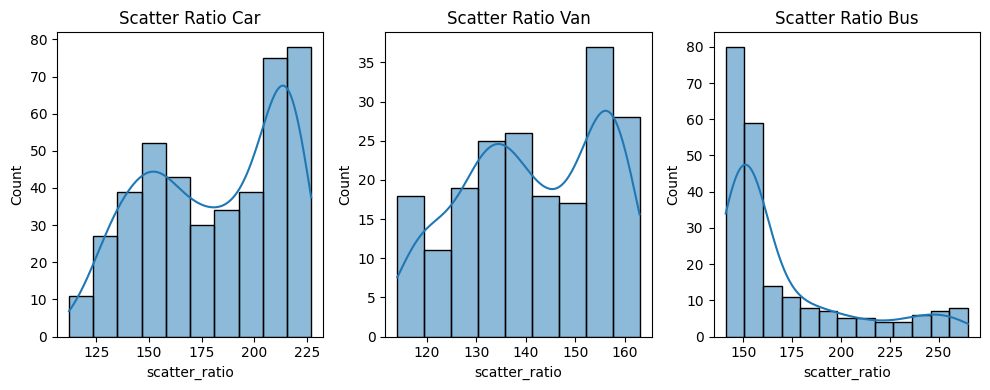

In [ ]:
# Filter for each class
vehicles_car = vehicles[vehicles['class']=='car']
vehicles_van = vehicles[vehicles['class']=='van']
vehicles_bus = vehicles[vehicles['class']=='bus']

# Visualize elongatedness
plt.figure(figsize=(10 ,4))
plt.subplot(1, 3, 1)
sns.histplot(vehicles_car['scatter_ratio'], kde=True)
plt.title('Scatter Ratio Car')

plt.subplot(1, 3, 2)
sns.histplot(vehicles_van['scatter_ratio'], kde=True)
plt.title('Scatter Ratio Van')

plt.subplot(1, 3, 3)
sns.histplot(vehicles_bus['scatter_ratio'], kde=True)
plt.title('Scatter Ratio Bus')

plt.tight_layout()
plt.show()

# MultiVariate Analysis

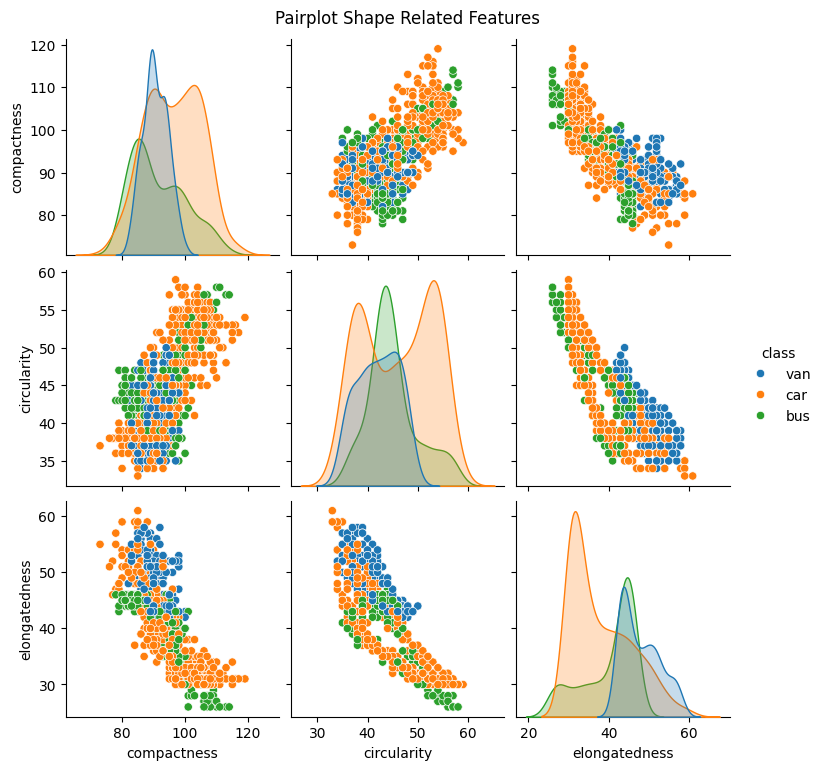

In [ ]:
shape_features = ['compactness', 'circularity', 'elongatedness', 'class']
sns.pairplot(vehicles[shape_features], hue='class', diag_kind='kde')
plt.suptitle('Pairplot Shape Related Features', y=1.02)
plt.show()

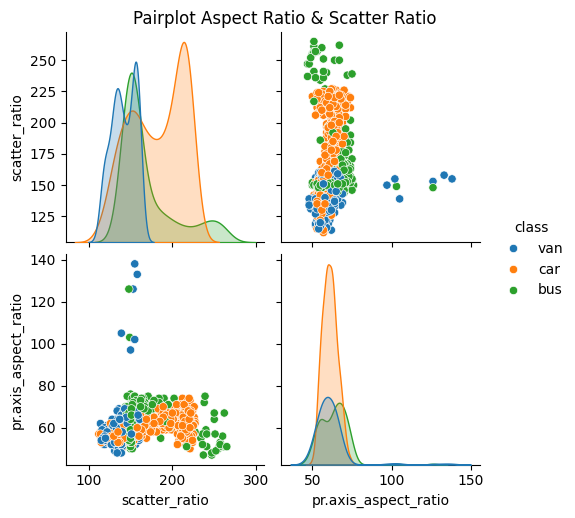

In [ ]:
aspect_features = ['scatter_ratio', 'pr.axis_aspect_ratio', 'class']
sns.pairplot(vehicles[aspect_features], hue='class', diag_kind='kde')
plt.suptitle('Pairplot Aspect Ratio & Scatter Ratio', y=1.02)
plt.show()

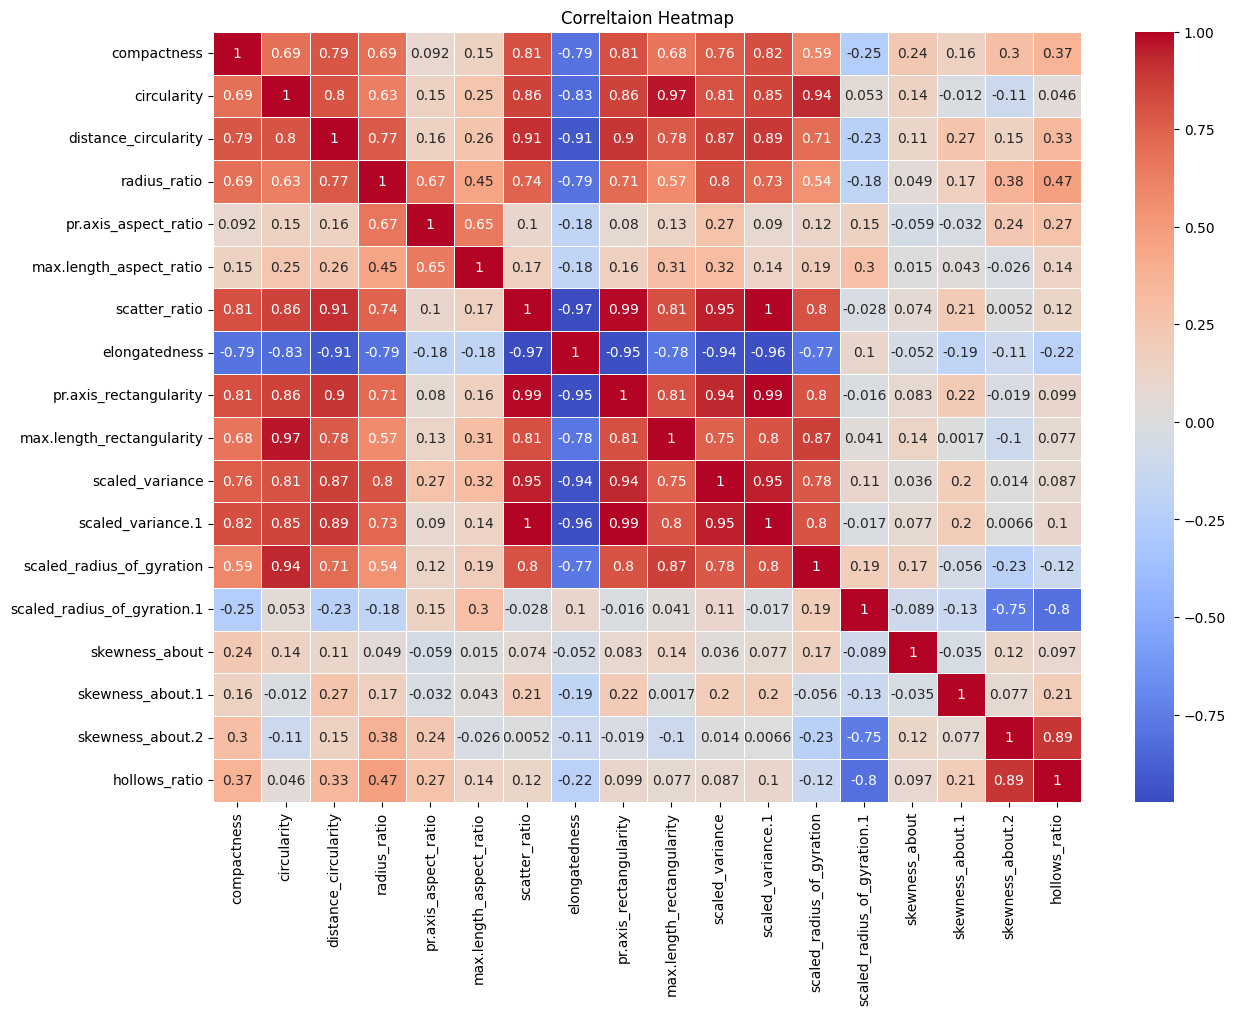

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(vehicles.drop(columns=["class"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correltaion Heatmap")
plt.show()

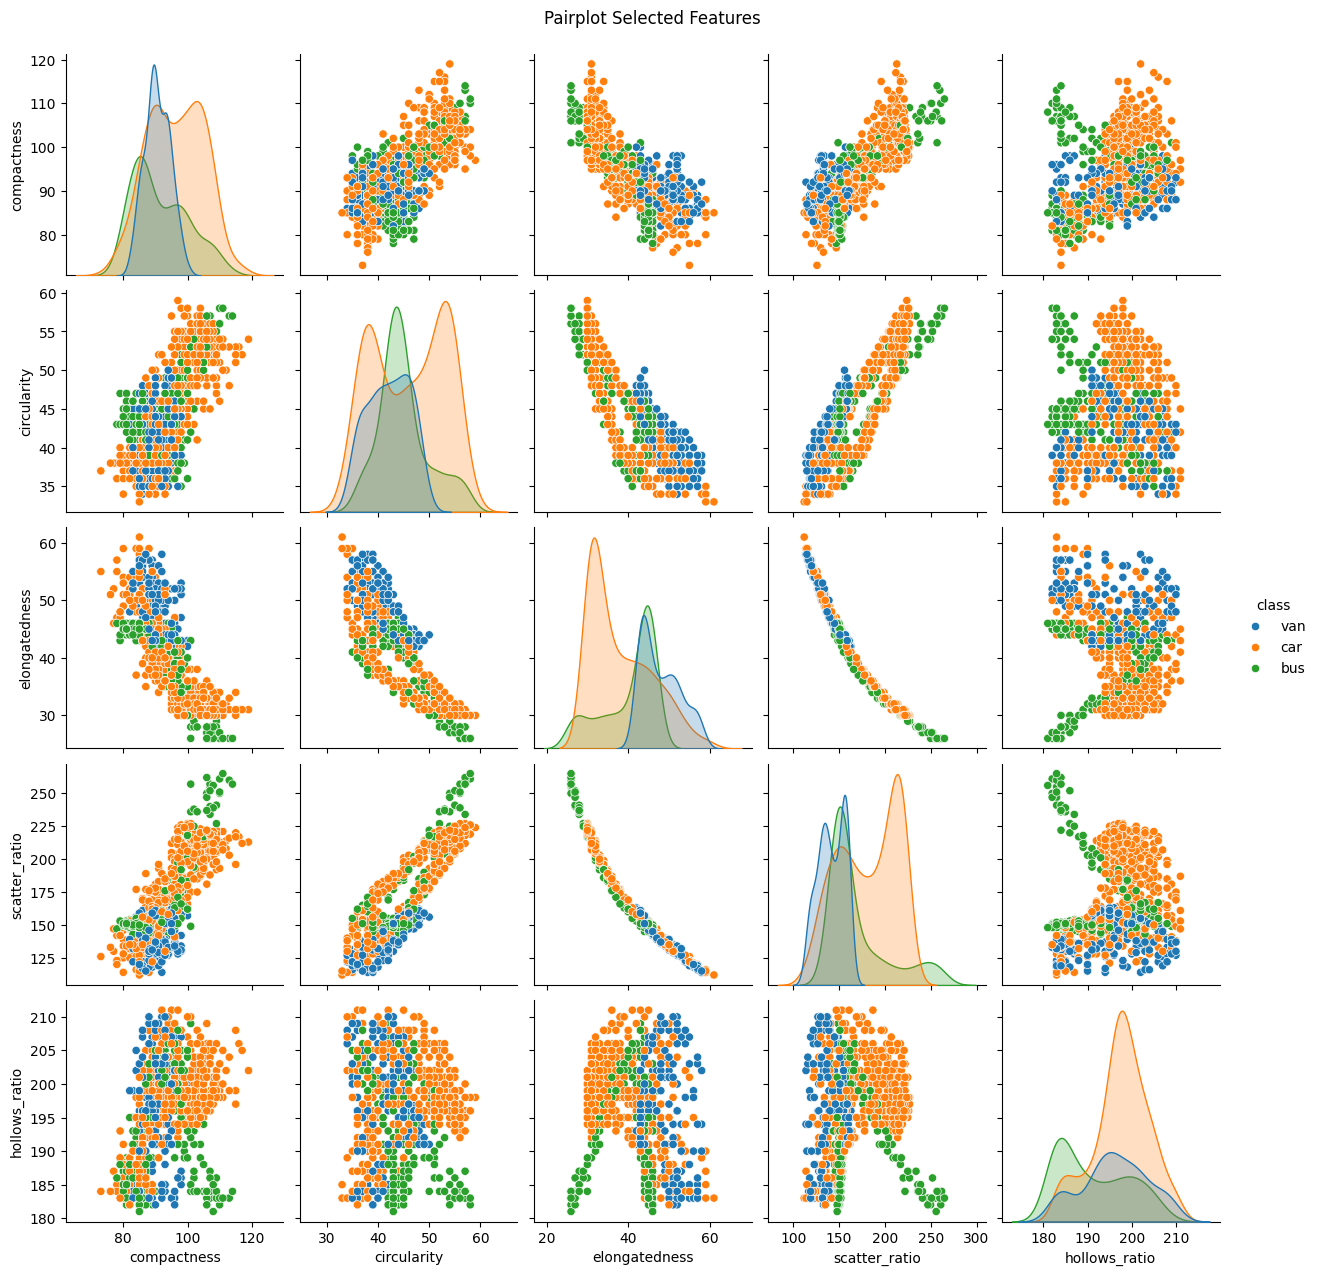

In [ ]:
selected_features = ["compactness", "circularity", "elongatedness", "scatter_ratio", "hollows_ratio", "class"]
sns.pairplot(vehicles[selected_features], hue="class", diag_kind="kde")
plt.suptitle("Pairplot Selected Features", y=1.02)
plt.show()

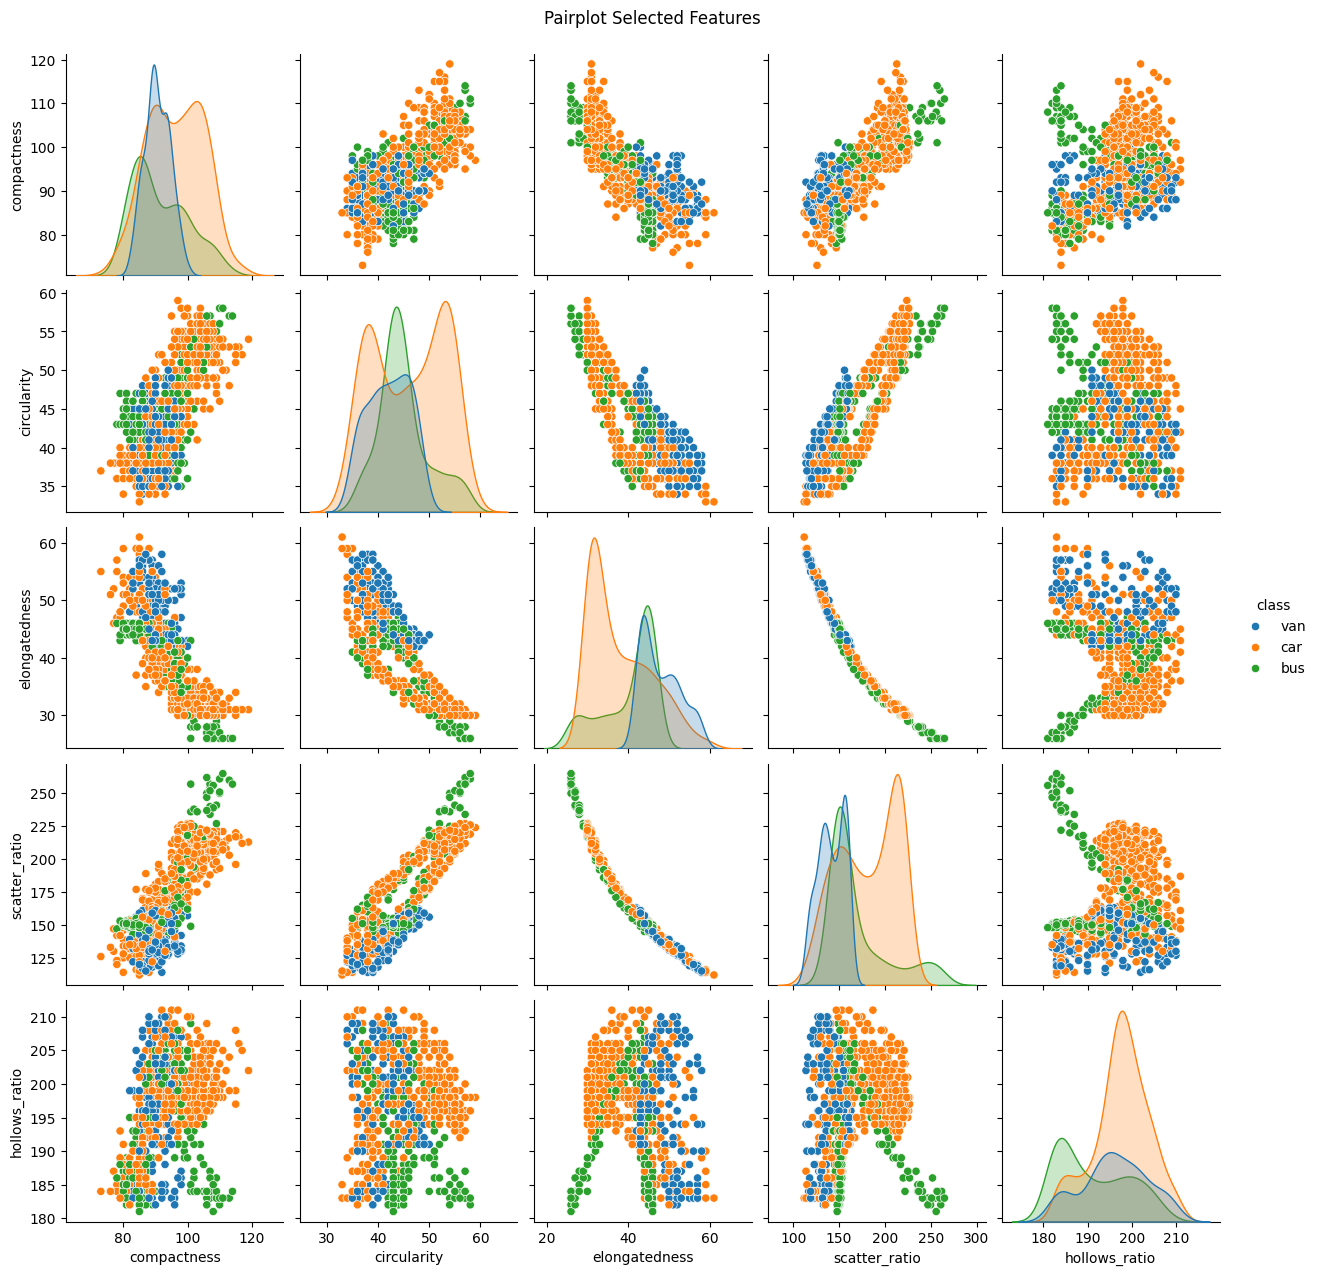

In [ ]:
sns.pairplot(vehicles[selected_features], hue="class", diag_kind="kde")
plt.suptitle("Pairplot Selected Features", y=1.02)
plt.show()